### Setup

In [74]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df_country_vaccinations = pd.read_csv('../Data/Processed-Data/country_vaccinations_normalized.csv')
df_WHO_global_daily = pd.read_csv('../Data/Processed-Data/WHO-COVID-19-global-daily-data_normalized.csv')

In [75]:
df_country_vaccinations.head()

,Unnamed: 0,iso_code,FIRST_VACCINE_DATE,days_since_first_vac,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,ABW,2021-02-17,40.0,Aruba,2021-03-29,25766.0,15600.0,10166.0,NaN,NaN,24.04,14.55,9.48,NaN,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
1,1,ABW,2021-02-17,41.0,Aruba,2021-03-30,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
2,2,ABW,2021-02-17,42.0,Aruba,2021-03-31,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
3,3,ABW,2021-02-17,43.0,Aruba,2021-04-01,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
4,4,ABW,2021-02-17,44.0,Aruba,2021-04-02,NaN,NaN,NaN,NaN,1278.0,NaN,NaN,NaN,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw


In [76]:
df_WHO_global_daily.head()

,Unnamed: 0,iso_code,FIRST_VACCINE_DATE,Date_reported,days_since_first_vac,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,ABW,2021-02-17,2020-01-04,-410.0,Aruba,AMR,NaN,0,NaN,0
1,1,ABW,2021-02-17,2020-01-05,-409.0,Aruba,AMR,NaN,0,NaN,0
2,2,ABW,2021-02-17,2020-01-06,-408.0,Aruba,AMR,NaN,0,NaN,0
3,3,ABW,2021-02-17,2020-01-07,-407.0,Aruba,AMR,NaN,0,NaN,0
4,4,ABW,2021-02-17,2020-01-08,-406.0,Aruba,AMR,NaN,0,NaN,0


Convert the Date columns into datetime format to make it easier to visualize

In [77]:
df_country_vaccinations["FIRST_VACCINE_DATE"] = pd.to_datetime(df_country_vaccinations["FIRST_VACCINE_DATE"], errors='coerce')
df_country_vaccinations["date"] = pd.to_datetime(df_country_vaccinations["date"], errors='coerce')

df_WHO_global_daily["FIRST_VACCINE_DATE"] = pd.to_datetime(df_WHO_global_daily['FIRST_VACCINE_DATE'], errors='coerce')
df_WHO_global_daily["Date_reported"] = pd.to_datetime(df_WHO_global_daily['Date_reported'], errors='coerce')

In [78]:
df_country_vaccinations.loc[:5,["FIRST_VACCINE_DATE", "date"]]
# df_WHO_global_daily.loc[:5,["FIRST_VACCINE_DATE", "Date_reported"]]

,FIRST_VACCINE_DATE,date
0,2021-02-17,2021-03-29
1,2021-02-17,2021-03-30
2,2021-02-17,2021-03-31
3,2021-02-17,2021-04-01
4,2021-02-17,2021-04-02
5,2021-02-17,2021-04-03


<hr>

### Data Visualizations

Text(0.5, 0.98, 'WHO-COVID-19-global-daily-data.csv')

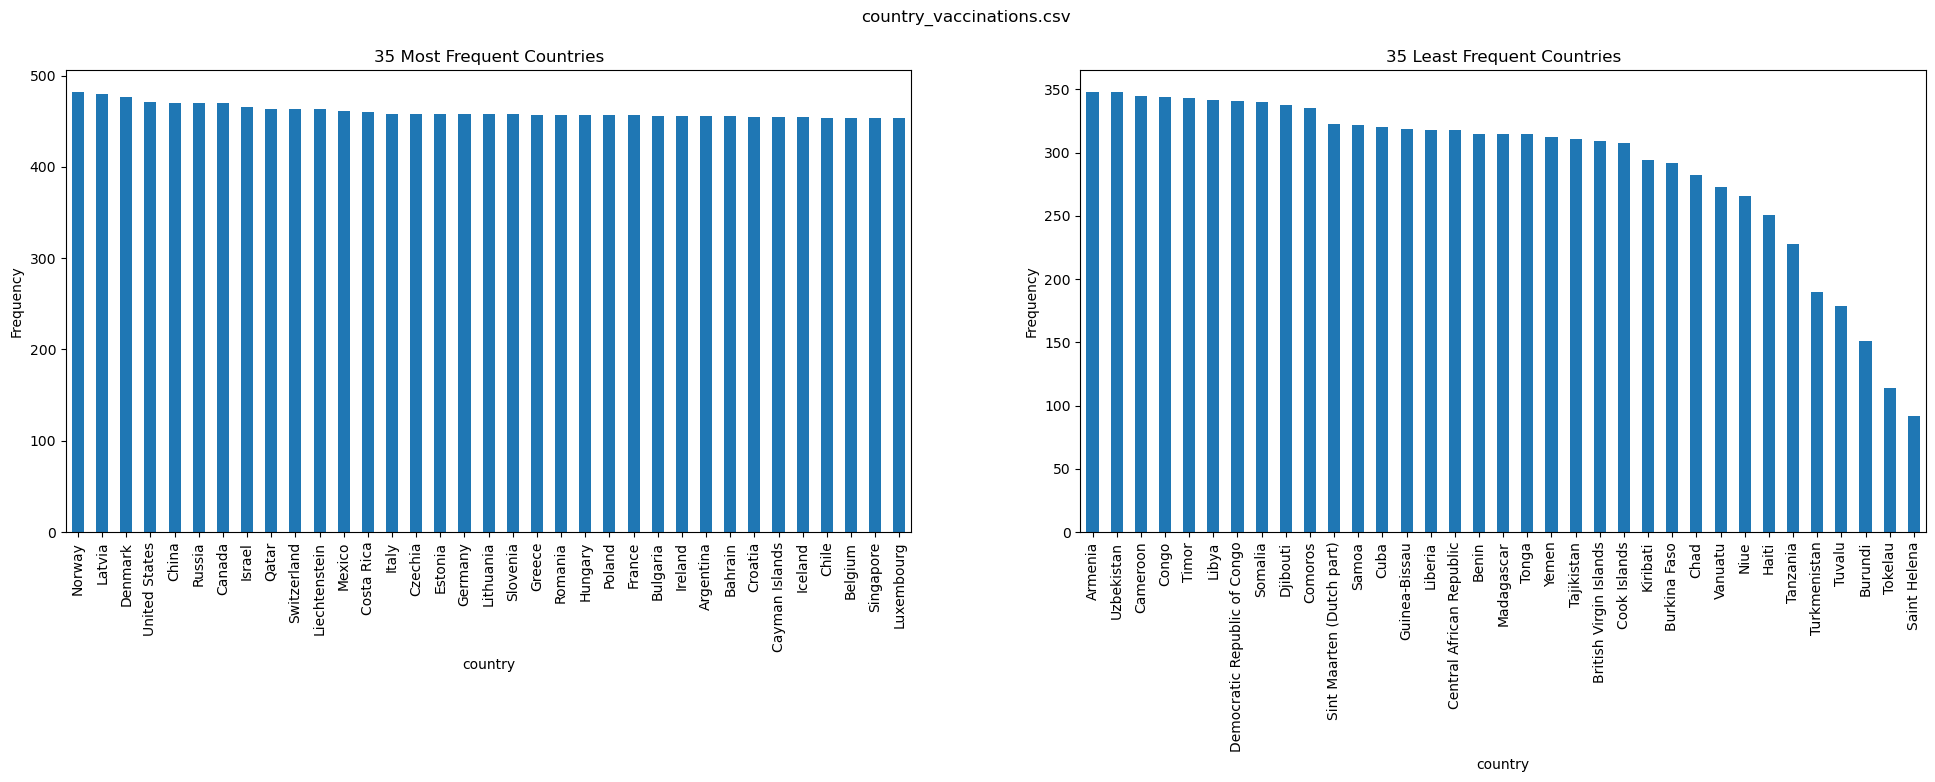

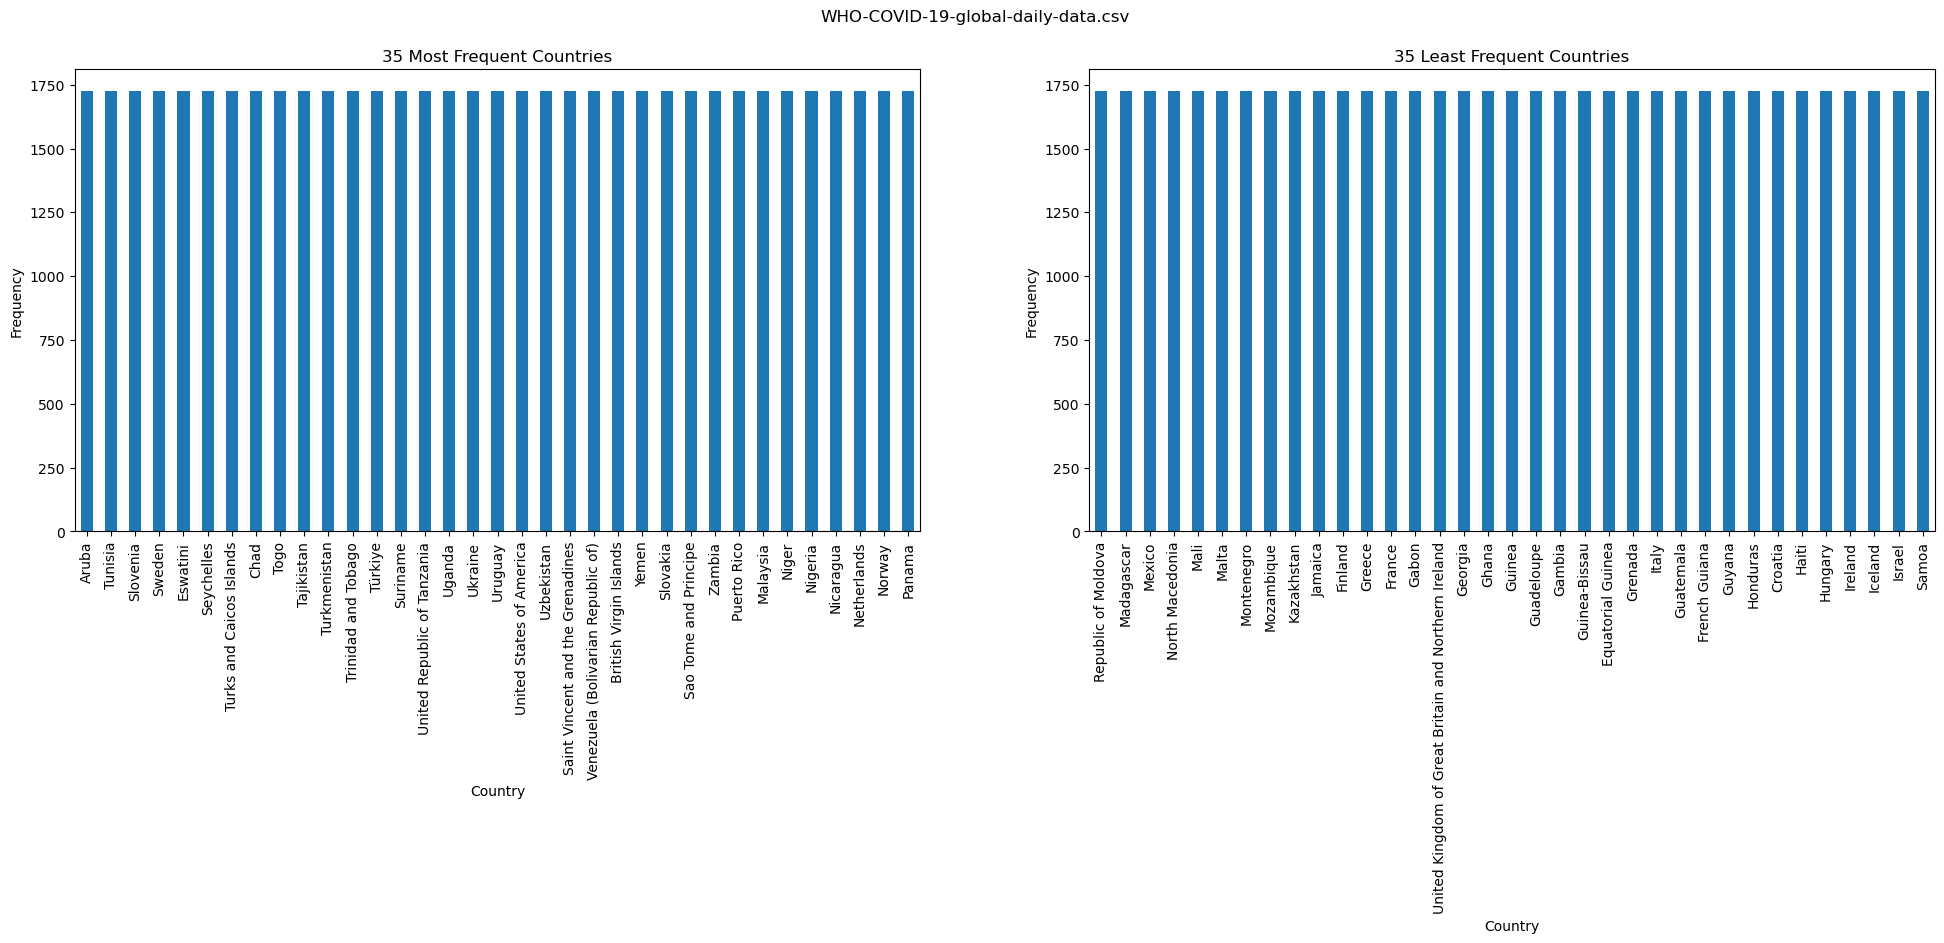

In [79]:
N = 35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
cv_country_count = df_country_vaccinations['country'].value_counts()

cv_country_count.head(N).plot(kind='bar', ax=ax1)
ax1.set_title(str(N) + ' Most Frequent Countries')
ax1.set_ylabel('Frequency') 

cv_country_count.tail(N).plot(kind='bar', ax=ax2)
ax2.set_title(str(N) + ' Least Frequent Countries')
ax2.set_ylabel('Frequency')

fig.suptitle("country_vaccinations.csv")

######################################################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
who_country_count = df_WHO_global_daily['Country'].value_counts()

who_country_count.head(N).plot(kind='bar', ax=ax1)
ax1.set_title(str(N) + ' Most Frequent Countries')
ax1.set_ylabel('Frequency') 

who_country_count.tail(N).plot(kind='bar', ax=ax2)
ax2.set_title(str(N) + ' Least Frequent Countries')
ax2.set_ylabel('Frequency')

fig.suptitle("WHO-COVID-19-global-daily-data.csv")

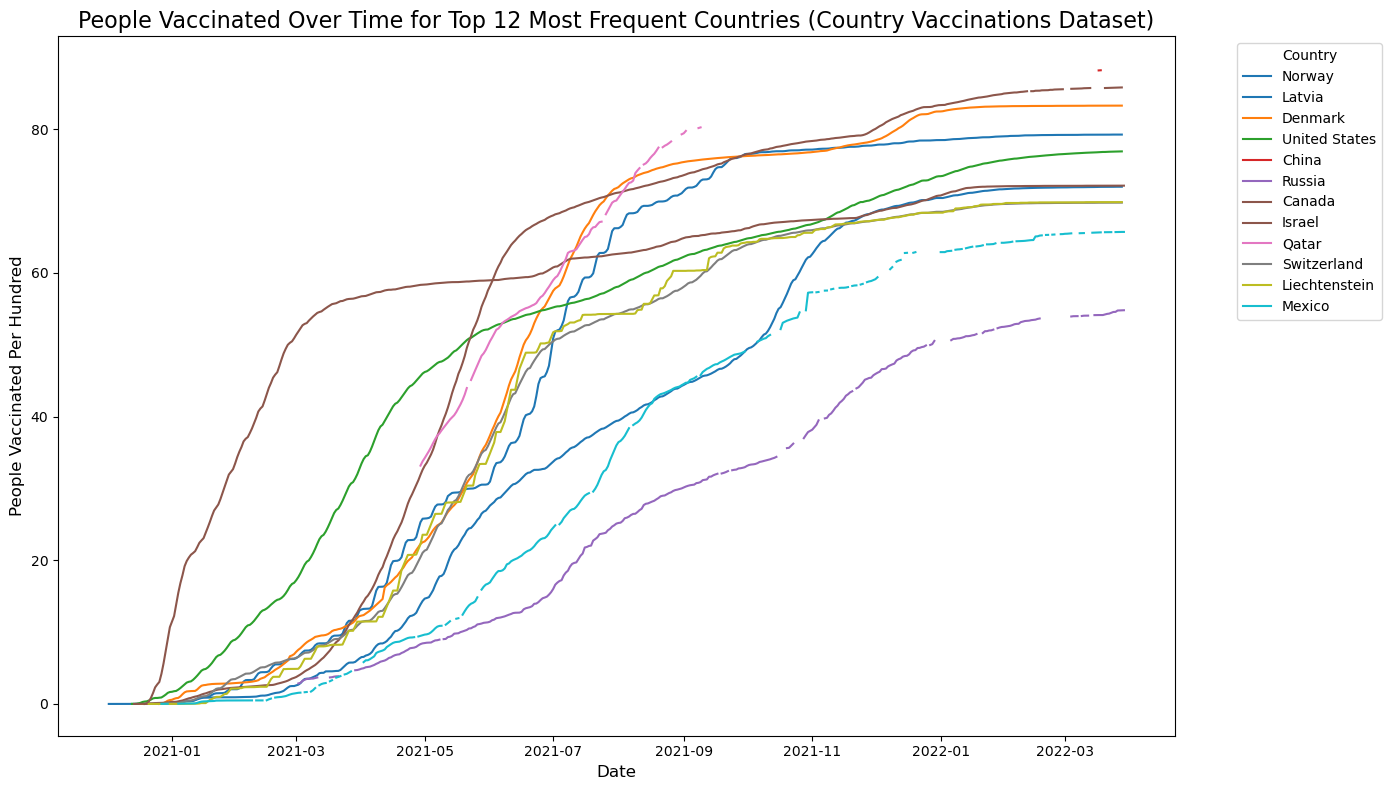

In [ ]:
plt.figure(figsize=(14, 8))  

N = 12

top_N_countries = cv_country_count.head(N)
colormap = matplotlib.colormaps['tab10']  

for i, country in enumerate(top_N_countries.index):
    # Filter data for each country
    country_data = df_country_vaccinations[df_country_vaccinations['country'] == country]
    
    # Plot the data for this country with a different color
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country, color=colormap(i / N))

plt.title(f'People Vaccinated Over Time for Top {N} Most Frequent Countries (Country Vaccinations Dataset)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('People Vaccinated Per Hundred', fontsize=12)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

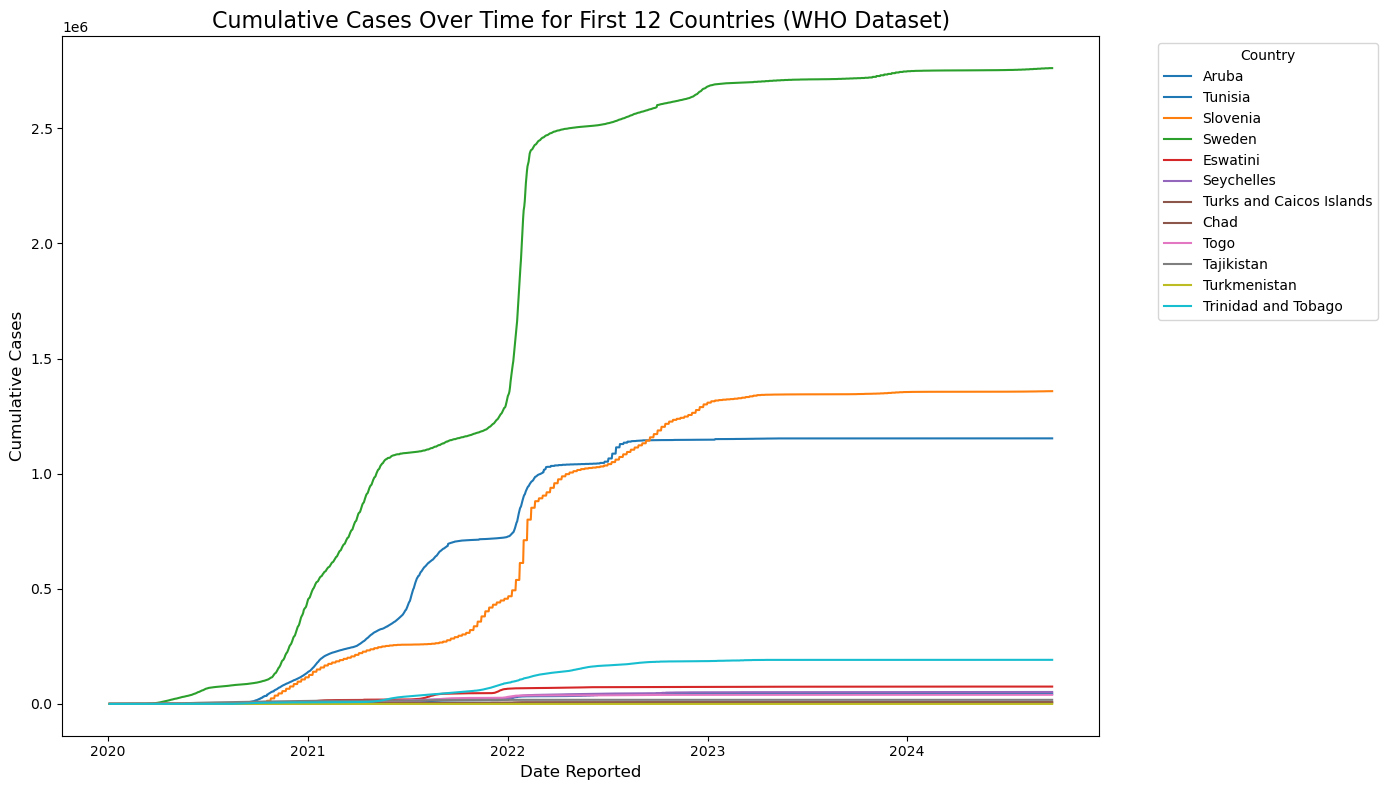

In [91]:
plt.figure(figsize=(14, 8))  

top_N_countries = who_country_count.head(N)
colormap = matplotlib.colormaps['tab10']  

for i, country in enumerate(top_N_countries.index):
    # Filter data for each country
    country_data = df_WHO_global_daily[df_WHO_global_daily['Country'] == country]
    
    # Plot the data for this country with a different color
    plt.plot(country_data['Date_reported'], country_data['Cumulative_cases'], label=country, color=colormap(i / N))

plt.title(f'Cumulative Cases Over Time for First {N} Countries (WHO Dataset)', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

*Reminder that WHO dataset has equal number of datapoints for each country, so none are more or less frequent than another